# Results

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from training_module import read_results
from cdc_module import plot_models_results, plot_all_results

downsampled_results = read_results('./results_cross_validation_down.json')
unbalanced_results = read_results('./results_cross_validation_ub.json')
upsampled_results = read_results('./results_cross_validation_up.json')
all_results = {
    "Downsampled": downsampled_results,
    "Unbalanced": unbalanced_results,
    "Upsampled": upsampled_results
}
models = ['lr', 'dt', 'rf', 'gbt', 'nb', 'svm', 'mlp']
metrics = ['accuracy', 'f1', 'recall', 'precision']
feature_methods = ['explained_variance', 'elbow_method', 'no_compound_features']
model_names_mapping = {
    'lr': 'Logistic Regression',
    'dt': 'Decision Tree',
    'rf': 'Random Forest',
    'gbt': 'Gradient Boosting',
    'nb': 'Naive Bayes',
    'svm': 'SVM',
    'mlp': 'Multi Layer Perceptron'
}
sampling_methods = ['Downsampled','Unbalanced','Upsampled']

## Comparing Sampling Techniques

We observe that, without rebalancing the dataset, all metrics (apart from accuracy) show worse performance. This suggests that the imbalanced dataset negatively impacts the model's ability to properly classify the data, especially when evaluating recall, precision, and F1 score. Therefore, rebalancing the dataset is necessary for improving the performance of the models in terms of these metrics. Moving forward, we will focus on comparing the performance of the models using the downsampled and upsampled datasets, as these methods address the class imbalance issue.

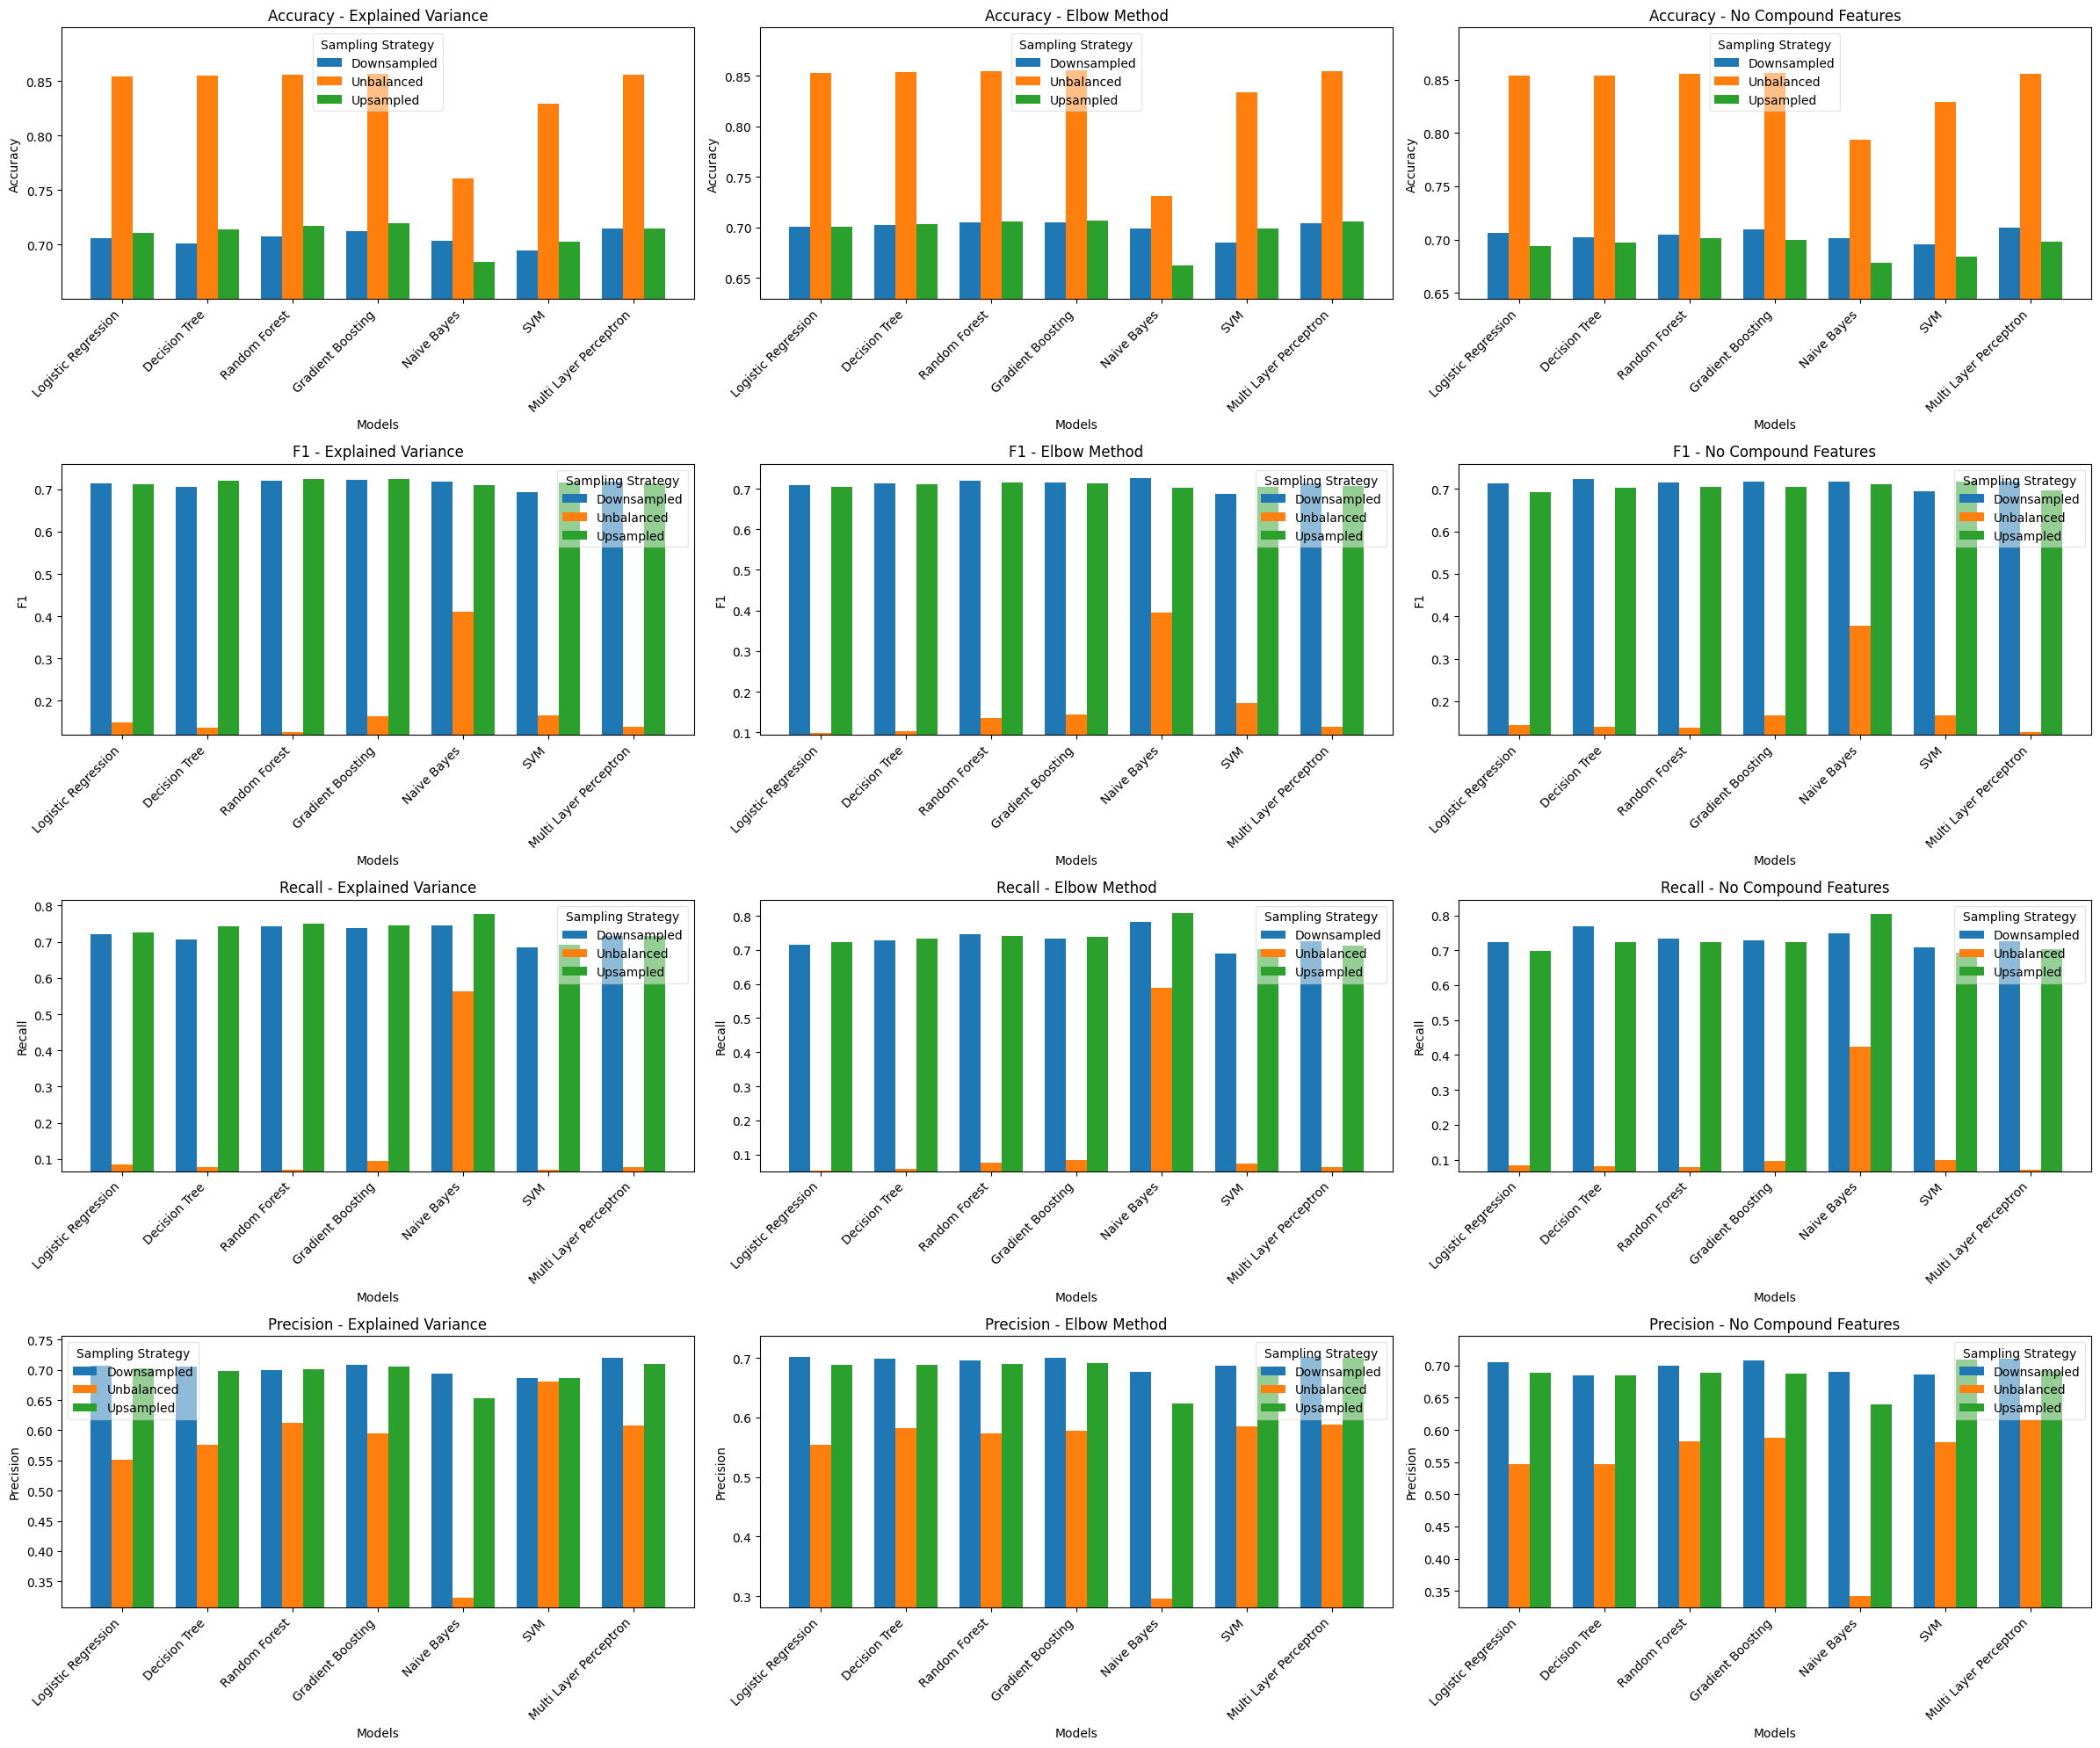

In [8]:
plot_all_results(all_results, models, metrics, feature_methods, model_names_mapping, sampling_methods)

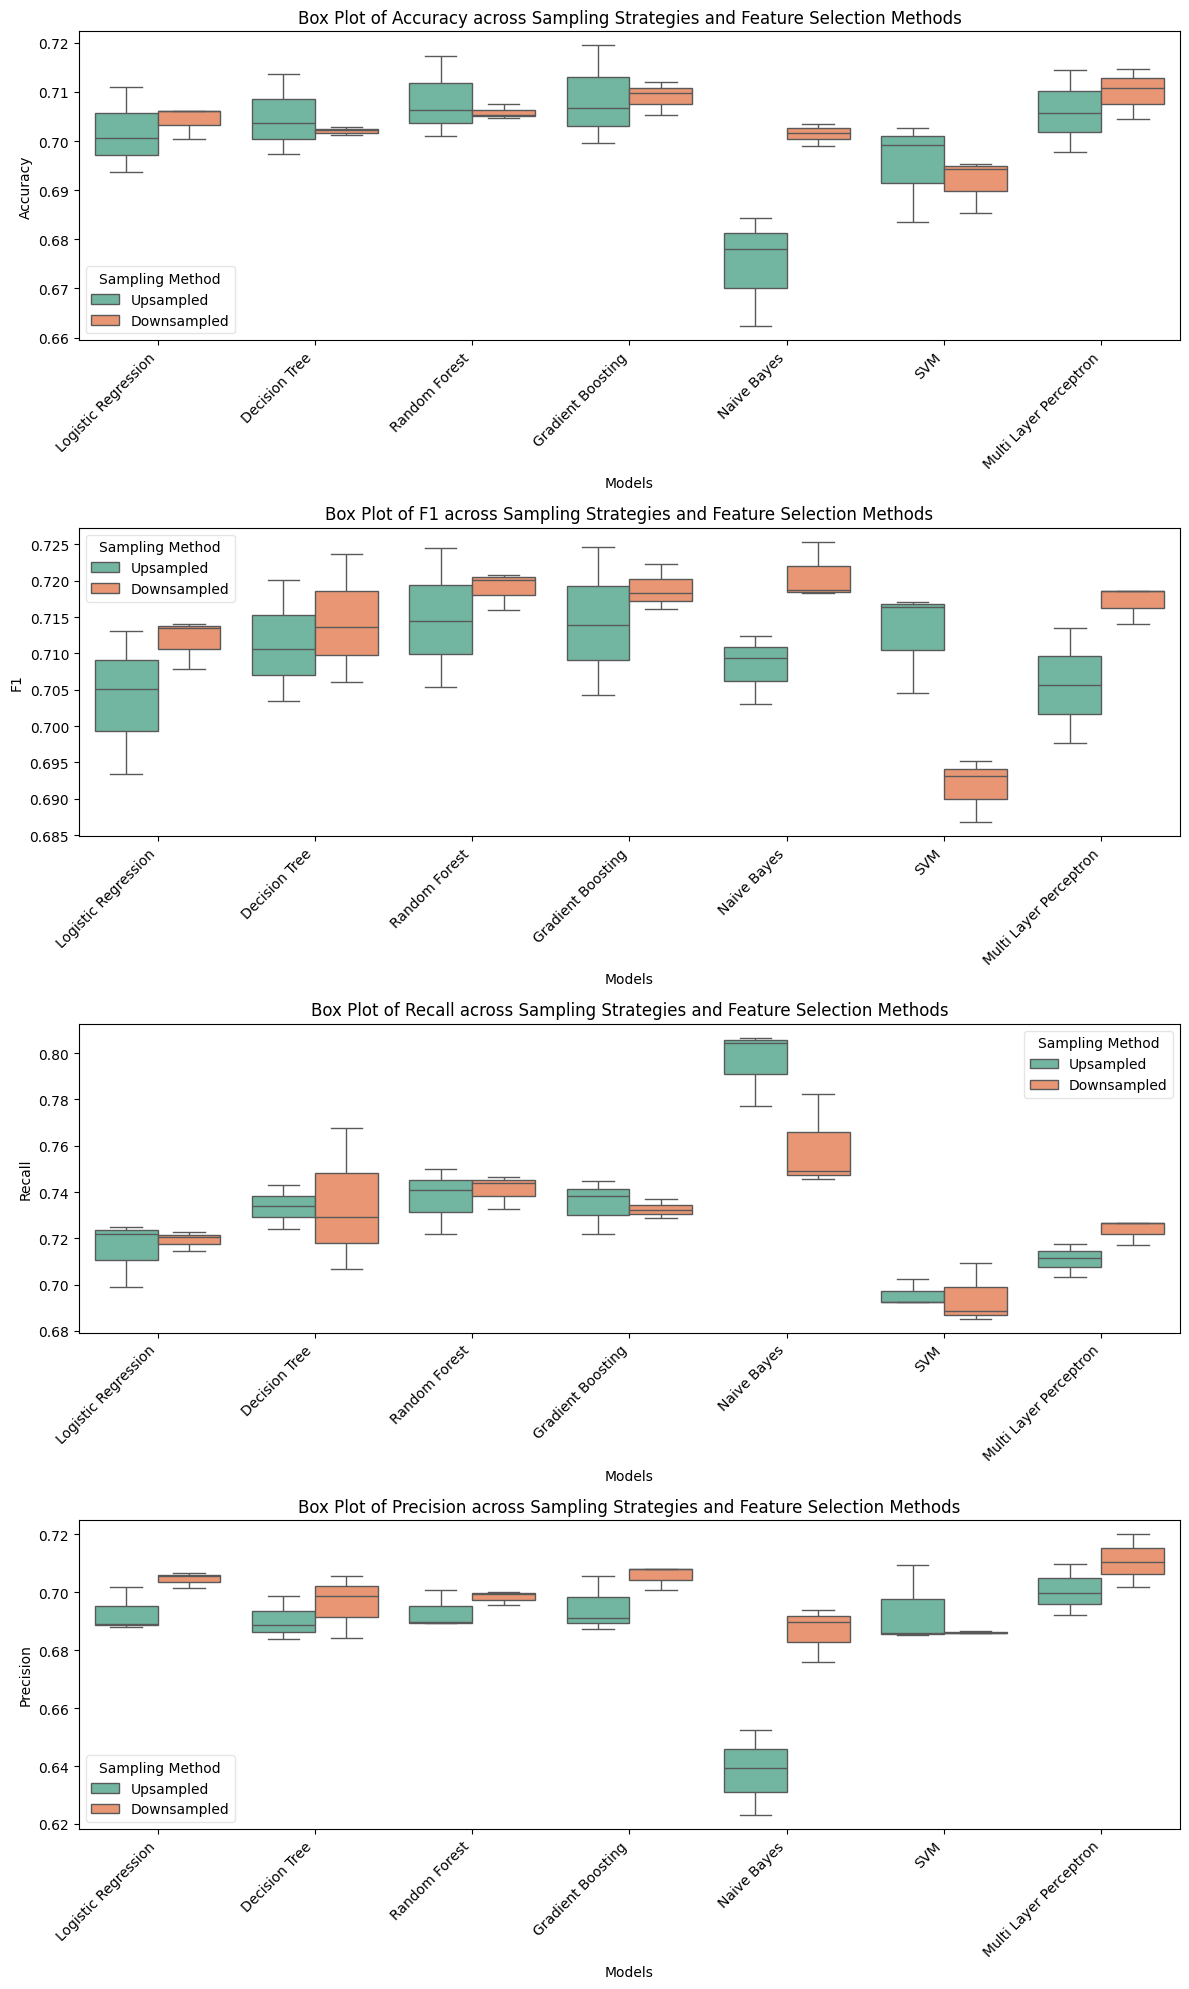

In [9]:
box_data = []
sampling_methods=['Upsampled','Downsampled']
for sampling_method in sampling_methods:
    results = all_results[sampling_method]
    for metric in metrics:
        for feature_method in feature_methods:
            for model in models:
                value = results[feature_method][model][metric]
                box_data.append({
                    'Sampling Method': sampling_method,
                    'Feature Selection': feature_method.replace("_", " ").title(),
                    'Model': model_names_mapping[model],
                    'Metric': metric,
                    'Value': value
                })

box_df = pd.DataFrame(box_data)

plt.figure(figsize=(12, 20))

for i, metric in enumerate(metrics):
    plt.subplot(len(metrics), 1, i + 1)
    
    sns.boxplot(x='Model', y='Value', hue='Sampling Method', 
                data=box_df[box_df['Metric'] == metric], 
                palette='Set2', dodge=True)

    plt.title(f'Box Plot of {metric.capitalize()} across Sampling Strategies and Feature Selection Methods')
    plt.xlabel('Models')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Sampling Method", framealpha=0.5)


plt.tight_layout()
plt.show()


## Comparing Feature Selection Techniques

We will compare the distribution of the models' results across different feature selection techniques and observe that the *explained variance dataset* yields the best results. This dataset consists of the four compound features we created, along with the nine most important features identified from the feature selection process. These nine features explain more than 75% of the variance in the dataset. One reason why this dataset produces the best results might be that it retains the highest number of features while also capturing the largest portion of the variance from the original dataset.

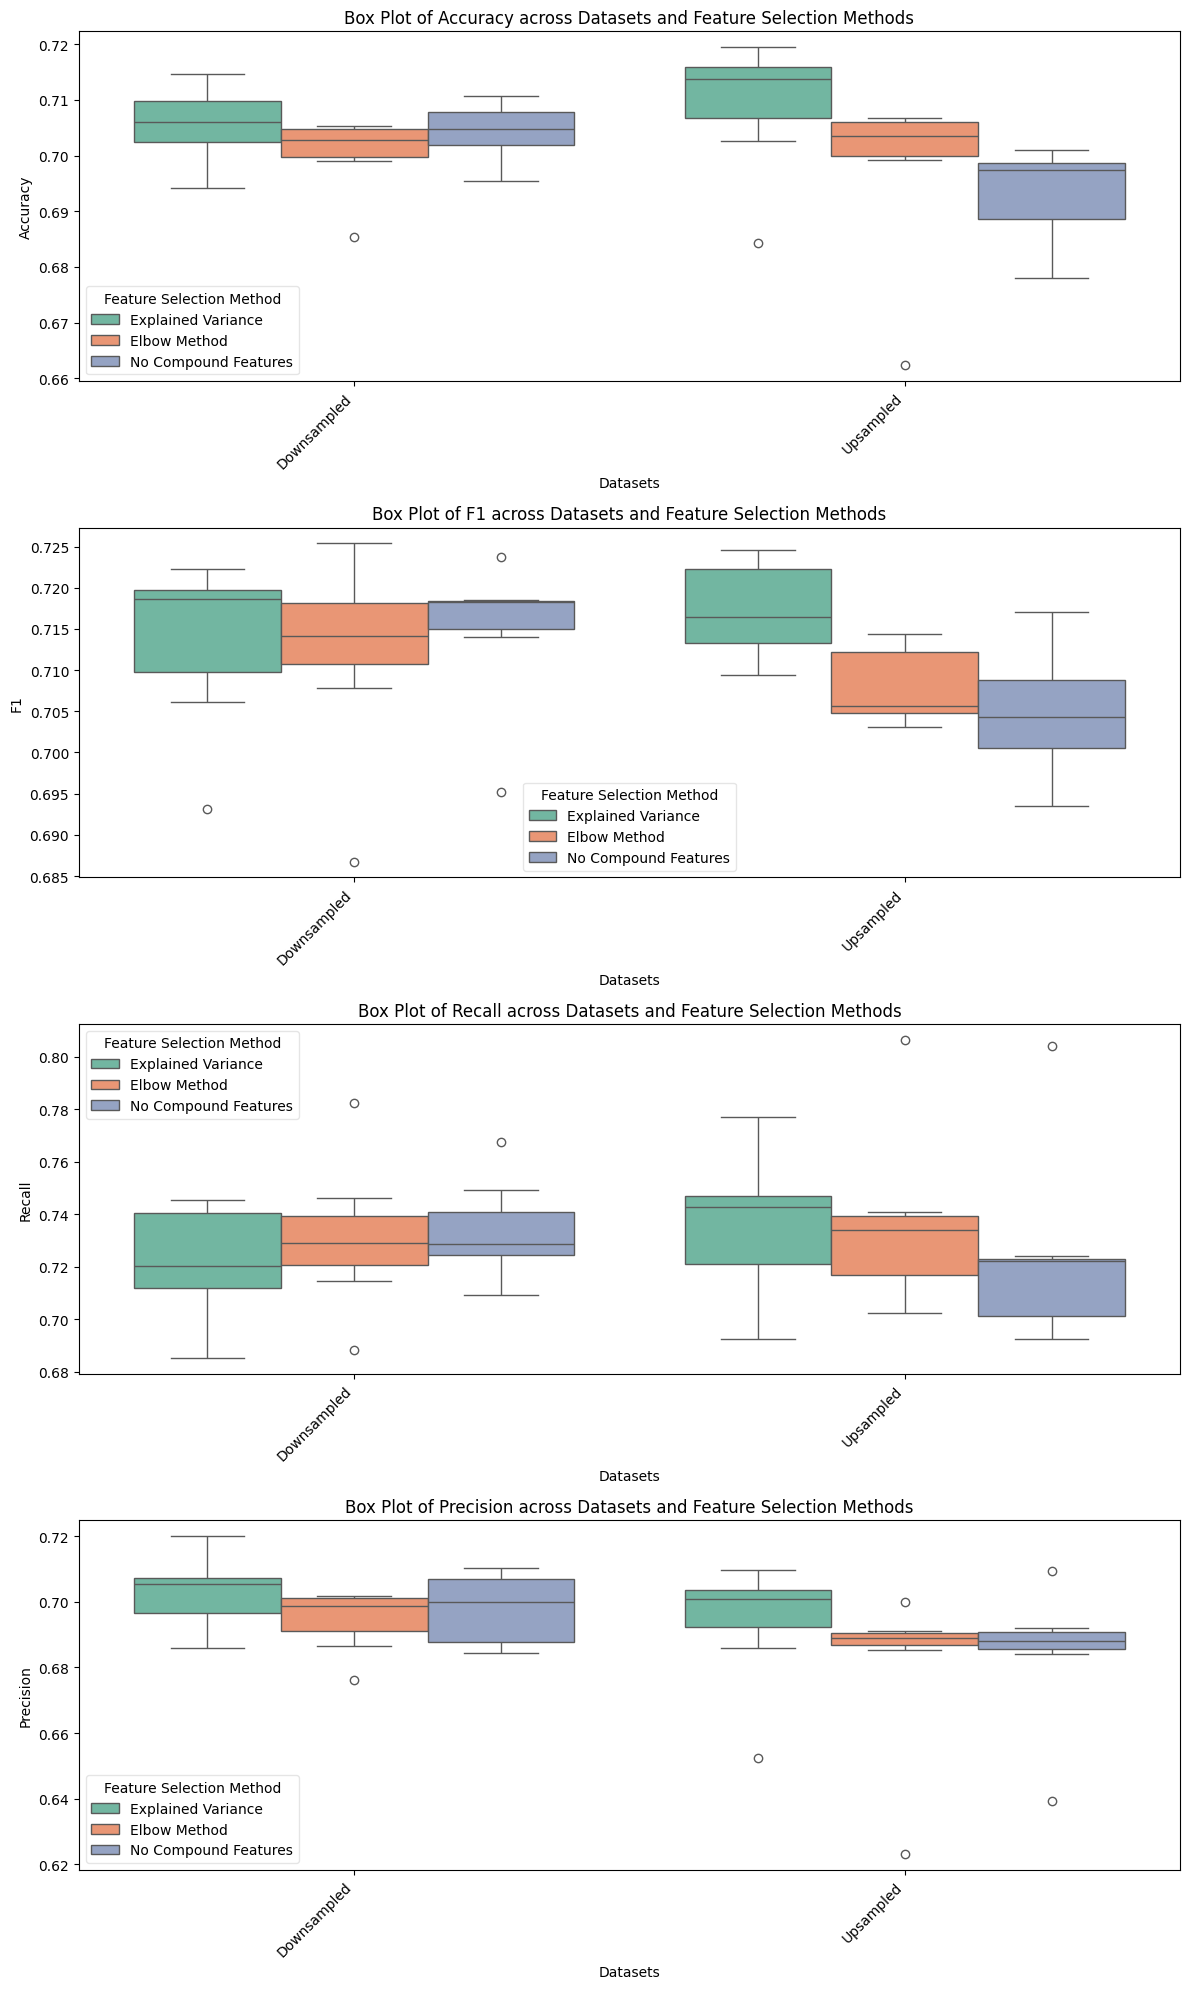

In [10]:
box_data = []
sampling_methods = ['Downsampled', 'Upsampled'] 

for sampling_method in sampling_methods:
    results = all_results[sampling_method]
    for metric in metrics:
        for feature_method in feature_methods:
            values = [results[feature_method][model][metric] for model in results[feature_method].keys()]
            for value in values:
                box_data.append({
                    'Dataset': sampling_method,
                    'Feature Selection': feature_method.replace("_", " ").title(),
                    'Metric': metric,
                    'Value': value  
                })


box_df = pd.DataFrame(box_data)

plt.figure(figsize=(12, 20))

for i, metric in enumerate(metrics):
    plt.subplot(len(metrics), 1, i + 1)
    sns.boxplot(x='Dataset', y='Value', 
                hue='Feature Selection', 
                data=box_df[box_df['Metric'] == metric], 
                palette='Set2', dodge=True)

    plt.title(f'Box Plot of {metric.capitalize()} across Datasets and Feature Selection Methods')
    plt.xlabel('Datasets')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Feature Selection Method", framealpha=0.5)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Comparing Upsampling and Downsampling results for the best feature selection method

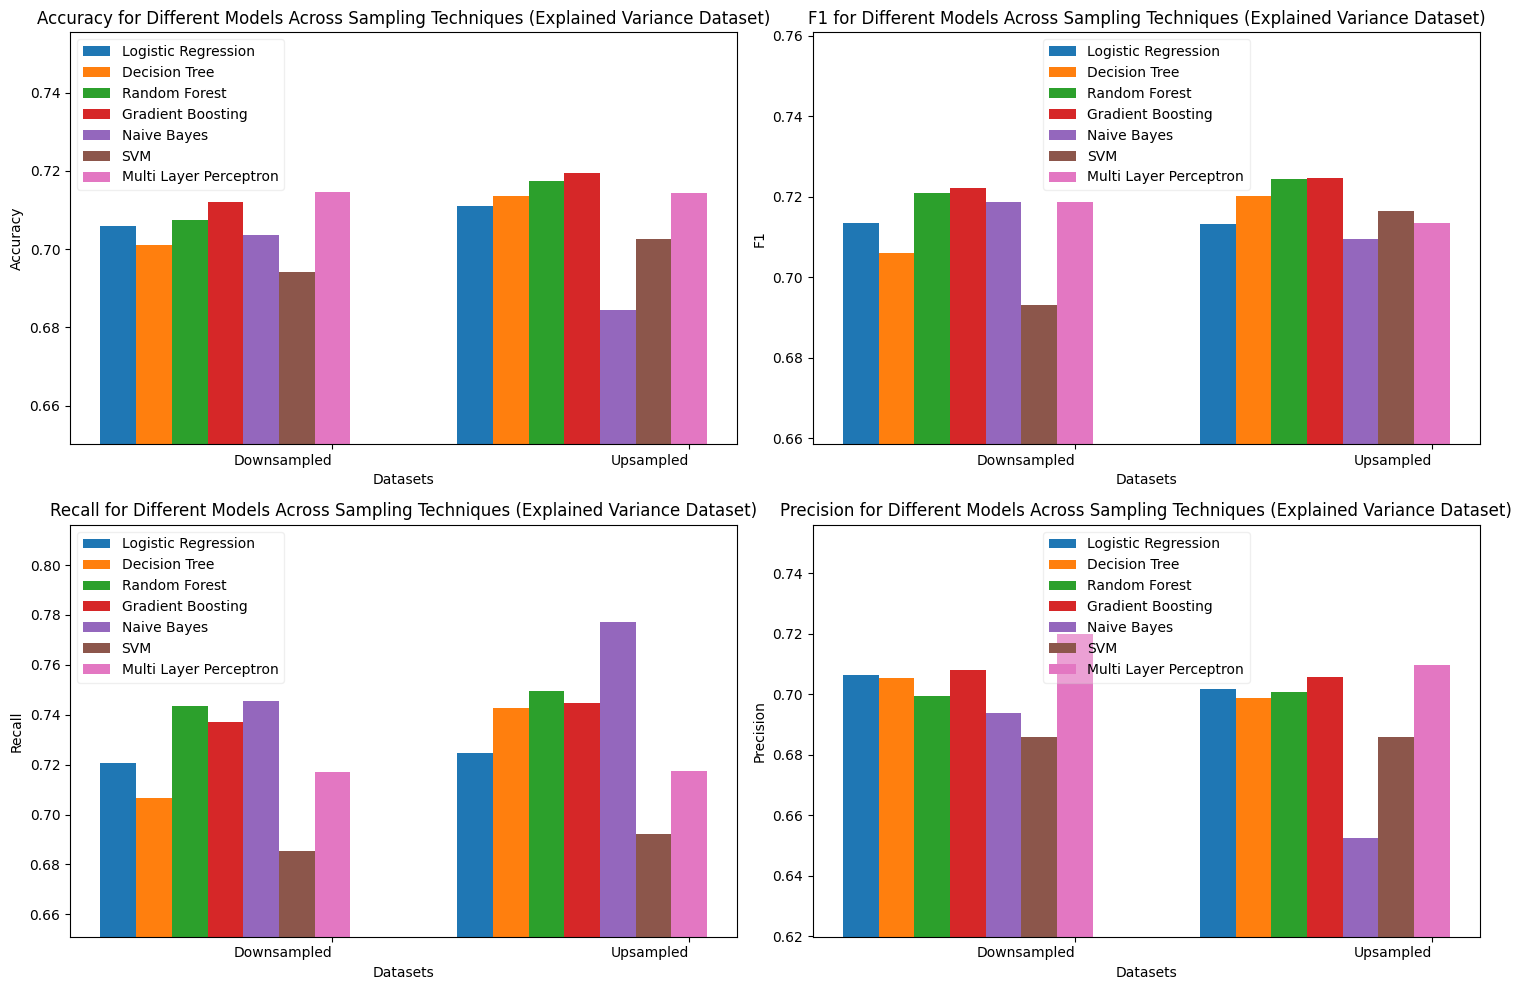

In [11]:
explained_variance_results = {key: all_results[key]["explained_variance"] for key in all_results.keys()}
plot_models_results(explained_variance_results, model_names_mapping, datasets=['Downsampled', 'Upsampled'], message='for Different Models Across Sampling Techniques (Explained Variance Dataset)')

We observe that the Gradient Boosting Classifier, Naive Bayes Classifier, and MLP all yield the best results, but each performs better on different metrics and with different sampling techniques. For instance, the recall of Naive Bayes is significantly higher when using upsampled data compared to downsampled data. When focusing solely on the F1 score, Gradient Boosting achieves the best results, particularly with the upsampled dataset. Looking at the following plot, we see that, in most cases, the results for the upsampled dataset are higher, although the improvements are not substantial. This suggests that if computational resources are limited, downsampling the data will still produce satisfactory results.

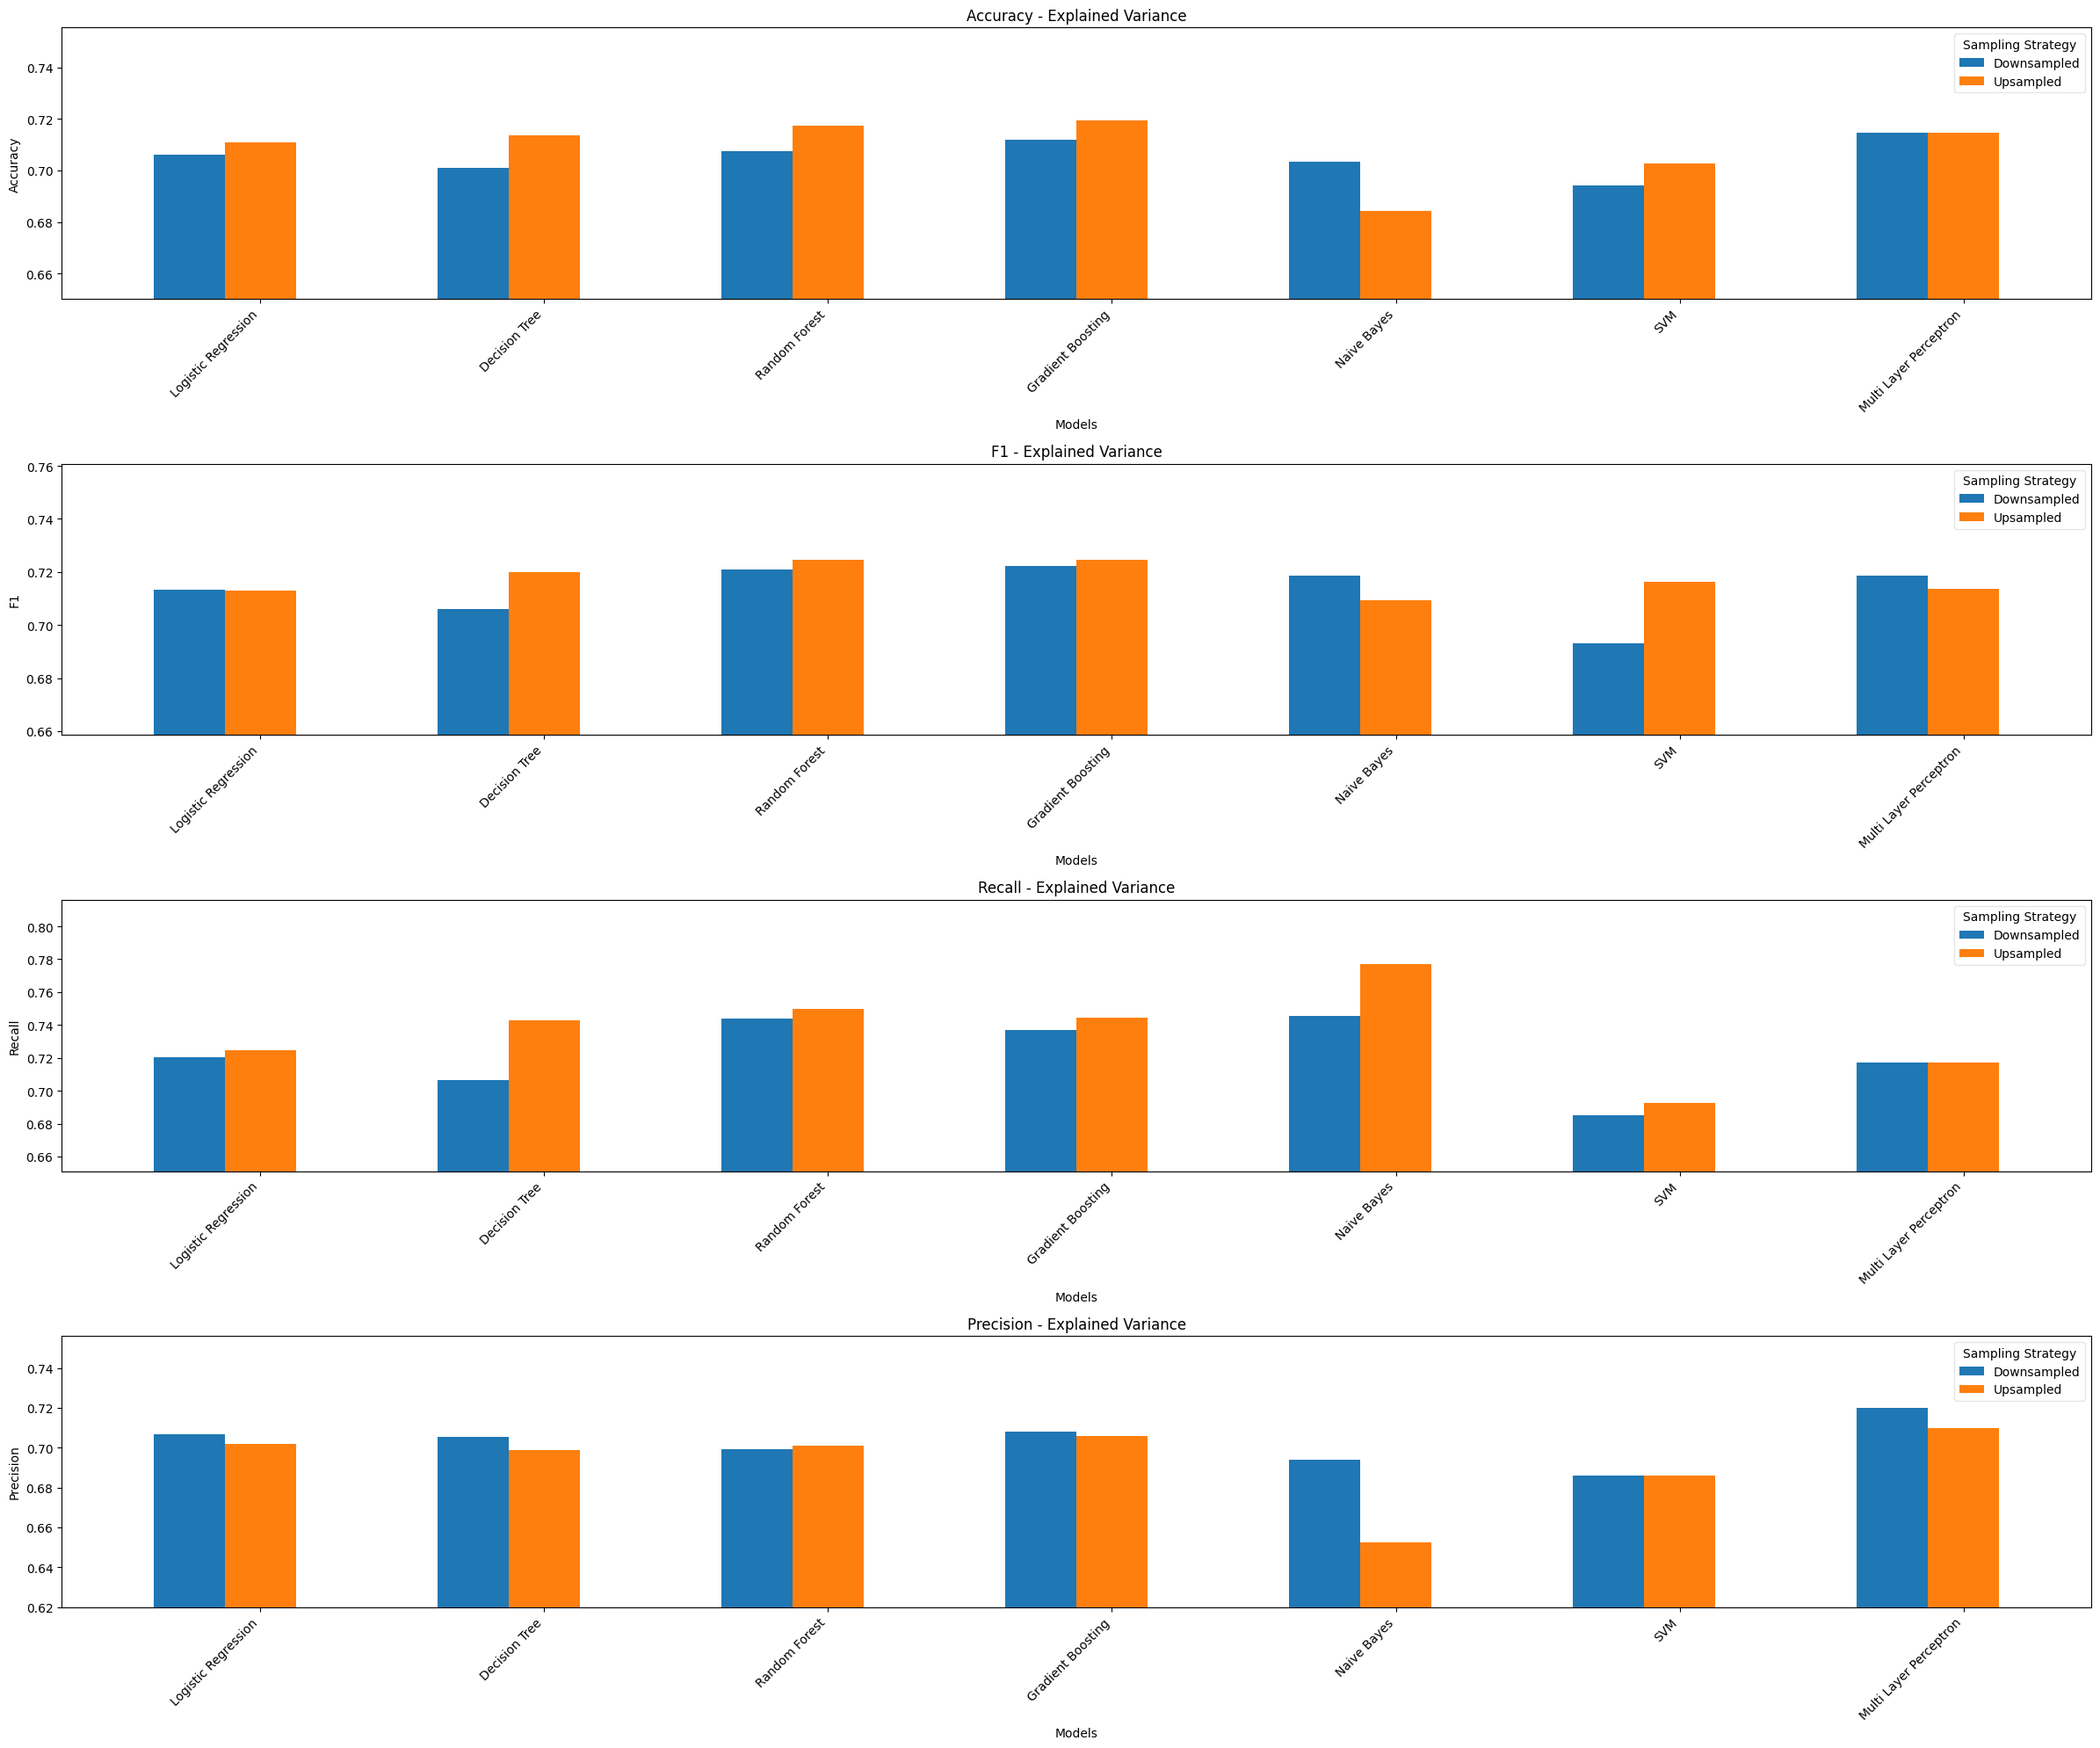

In [12]:
plot_all_results(all_results, models, metrics, ['explained_variance'], model_names_mapping, sampling_methods=['Downsampled', 'Upsampled'])